# Task 1

In [1]:
import re

In [2]:
import nltk

In [3]:
# !pip install sentencepiece (didn't do what i thought it would do)

In [3]:
#open the dataset, ignore errors as it cant be decoded
with open(r'E:/reviews_data.txt',encoding="utf-8",errors="ignore") as f:
    data = f.read()

In [14]:
# TOOK ME AROUND 6-7 MINUTES TO RUN THIS PART, WOULD RECOMMNED DISCONNECTING FORM INTERNET AND CLOSING EVERYTHING ELSE
processed_features = []
for sentence in range(0, len(data)):
   # removing all single characters
   processed_feature= re.sub(r'[^\w\s]', ' ', str(data))

   # Converting to Lowercase
   processed_feature = processed_feature.lower()
   processed_features+=processed_feature
   #processed_feature.append(processed_feature)

#processed_features

MemoryError: 

In [ ]:
#Can't run above code anymore

In [12]:
# new_contents = []
# for i in range(0, len(processed_feature)):
#     new_content = nltk.tokenize.TreebankWordTokenizer().tokenize(processed_feature[i])
#     new_contents.append(new_content)

# #new_contents 

In [2]:
# #Try reading only 2000 characters
# data=data[0:2000]

In [ ]:
# raw = open(filename)
# tokenized = ''
# for line in raw:
#     tokenized += nltk.word_tokenize(line)

In [18]:
#Tokenization
from nltk.tokenize import word_tokenize  
from nltk.tokenize import RegexpTokenizer
tokenized = ''
for line in data:
    tokens = data.lower()  #convert to lowercase
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(tokens) #tokenize and remove punctuation
#sample doc1 tokenized
#print(tokens[0:100])

MemoryError: 

In [5]:
#Remove stopwords,lemmatize
from nltk.corpus import stopwords
import re, string
def preprocess(list):
    l=[]
    for word in list:
        if word not in set(stopwords.words("english")) and len(word)>2:
            lem = WordNetLemmatizer()
            word=lem.lemmatize(word)
            word=re.sub(r"\d+","",word)
            word=word.strip()
            l.append(word)
        else:
            pass
    return l

In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
clean = preprocess(tokens)

[nltk_data] Downloading package wordnet to C:\Users\Ronisha
[nltk_data]     Basker\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


KeyboardInterrupt: 

In [8]:
#sample of preprocessed data
#print(clean[0:100])

['oct', '', 'nice', 'trendy', 'hotel', 'location', 'bad', 'stayed', 'hotel', 'one', 'night', 'fairly', 'new', 'place', 'taxi', 'driver', 'know', 'want', 'drive', 'eventually', 'arrived', 'hotel', 'pleasantly', 'surprised', 'decor', 'lobby', 'ground', 'floor', 'area', 'stylish', 'modern', 'found', 'reception', 'staff', 'geeting', 'aloha', 'bit', 'place', 'guess', 'briefed', 'say', 'keep', 'coroporate', 'image', 'starwood', 'preferred', 'guest', 'member', 'given', 'small', 'gift', 'upon', 'check', 'couple', 'fridge', 'magnet', 'gift', 'box', 'nevertheless', 'nice', 'gesture', 'room', 'nice', 'roomy', 'tea', 'coffee', 'facility', 'room', 'get', 'two', 'complimentary', 'bottle', 'water', 'plus', 'toiletry', 'bliss', 'location', 'great', 'last', 'metro', 'stop', 'need', 'take', 'taxi', 'planning', 'going', 'see', 'historic', 'site', 'beijing', 'chose', 'breakfast', 'hotel', 'really', 'tasty', 'good', 'selection', 'dish', 'couple', 'computer']


In [27]:
#Create word2vec model
import gensim
import multiprocessing
from gensim import models
from gensim.models import Word2Vec
cores = multiprocessing.cpu_count()
w2v_model = Word2Vec(min_count=1,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=cores-1)
w2v_model.build_vocab([clean], progress_per=10000)
w2v_model.train([clean], total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#Find similar words
w2v_model.most_similar(positive=["one","gift"], negative=["two"],topn=5)

RuntimeError: you must first build vocabulary before training the model

In [14]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in w2v_model.wv.vocab:
        tokens.append(w2v_model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


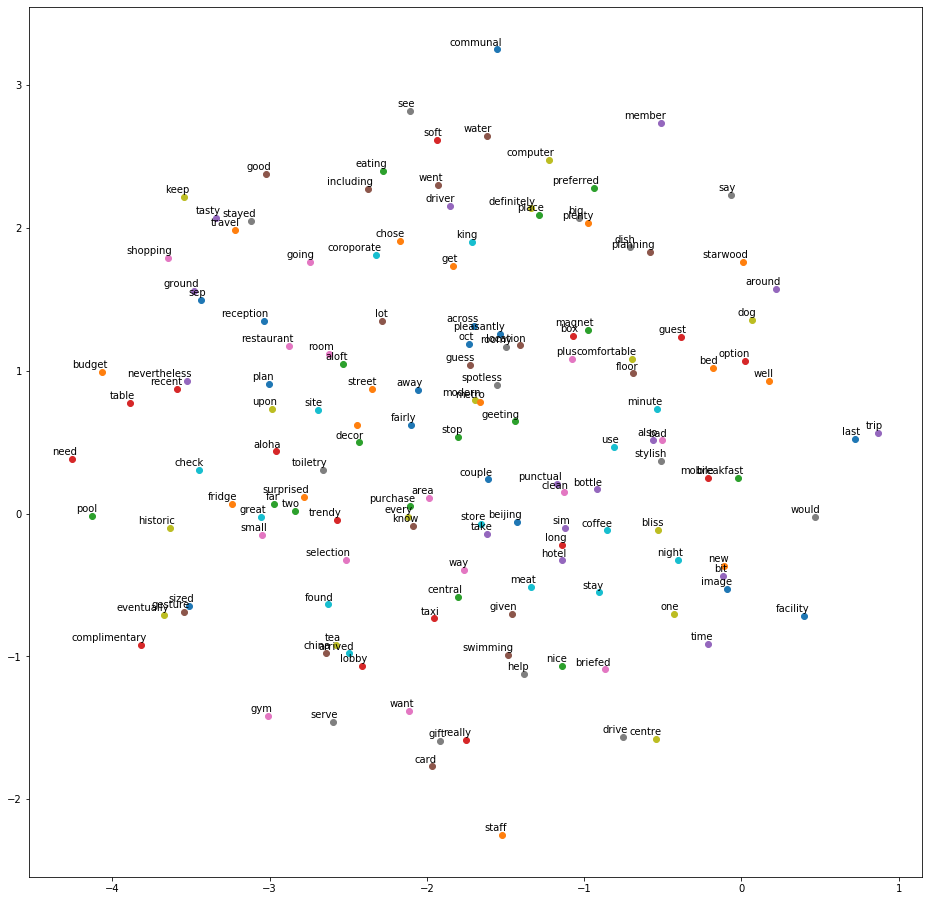

In [15]:
tsne_plot(w2v_model)

# Task 2

## K-means

In [34]:
from nltk.cluster import KMeansClusterer
import nltk
input = w2v_model.wv[w2v_model.wv.vocab]
NUM_CLUSTERS=3
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(input, assign_clusters=True)

In [35]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(input)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
 
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
 
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(input))
 
silhouette_score = metrics.silhouette_score(input, labels, metric='euclidean')
 
print ("Silhouette_score: ")
print (silhouette_score)

Cluster id labels for inputted data
[1 1 1 2 2 2 1 2 0 1 1 2 0 0 0 1 2 2 2 1 1 2 2 1 2 2 1 1 2 0 1 2 1 0 2 2 1
 2 2 2 0 1 0 2 0 2 2 2 0 1 2 0 2 1 0 1 2 2 2 0 0 2 2 2 1 0 2 0 1 2 1 2 2 2
 0 1 2 1 0 0 2 2 1 1 1 1 2 0 0 1 0 0 1 0 1 2 2 0 0 2 2 2 2 1 2 2 2 0 0 1 1
 0 0 0 1 2 0 2 2 2 1 2 2 1 1 0 0 1 0 0 1 2 2 0 2 0 2 2 1 2 2 0 2 1 1 1]
Centroids data
[[ 1.27331528e-04 -3.11776996e-04  1.33790963e-04 -9.83142454e-05
   5.79607906e-04  2.04042648e-04 -1.27975974e-04 -2.89279444e-04
   1.09143730e-05 -3.50702321e-04  3.43508029e-04 -2.49030185e-04
   1.09173103e-04 -1.28229425e-04  1.63584045e-05  2.97283521e-04
   4.67634294e-04 -5.66446106e-05 -7.05736420e-06  1.04673061e-04
   3.22744949e-04  6.05227797e-05  1.47063794e-04  1.10044115e-04
  -7.83879223e-05 -3.10226722e-04  2.96189901e-05  3.14113975e-04
  -3.18127386e-05  2.59573077e-04  1.48498497e-04 -1.05229752e-04
  -6.88467408e-05 -2.29683465e-05  6.09864364e-05 -1.31441338e-04
   3.43668944e-06  4.04243619e-05 -3.47626337e-05  1.08698

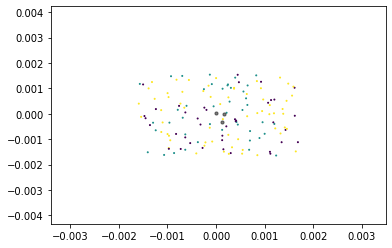

In [37]:
y_kmeans = kmeans.predict(input)
plt.scatter(input[:, 0], input[:, 1], c=y_kmeans, s=1, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=10, alpha=0.5);

## Heirachy Agglomerative Clustering

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.vectors instead).
  after removing the cwd from sys.path.


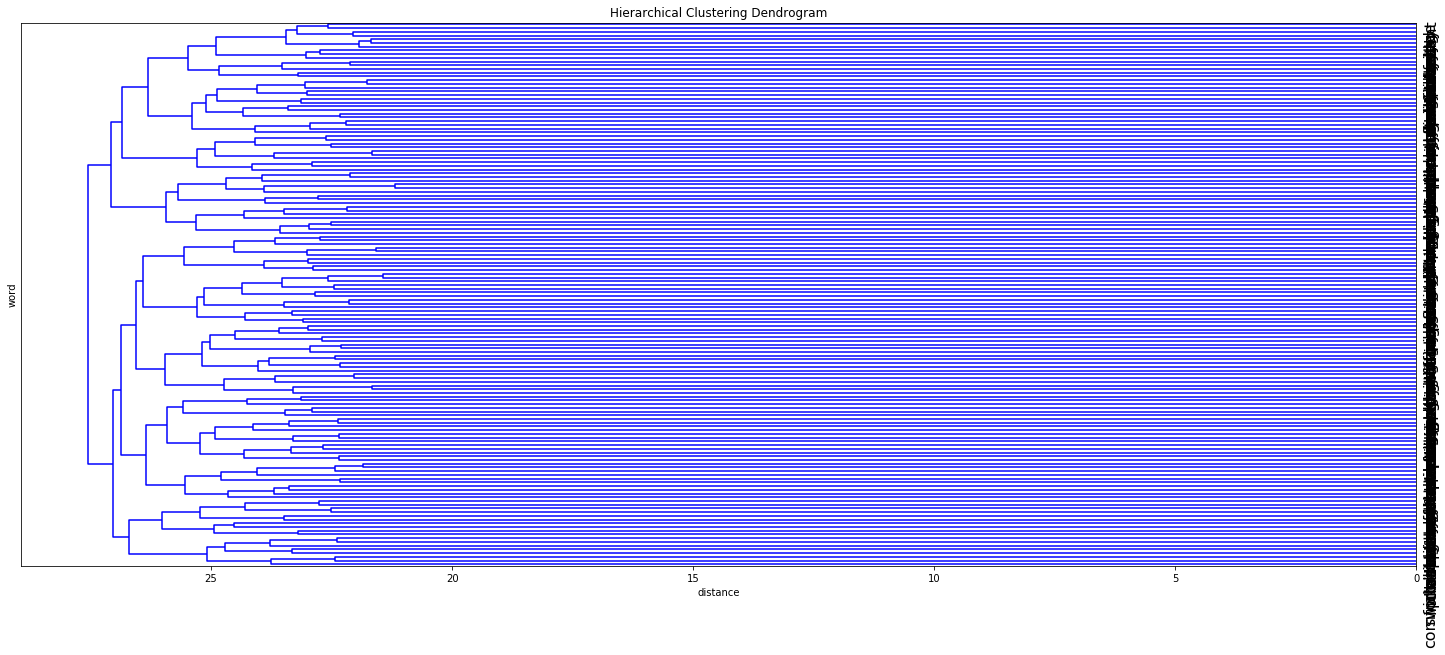

In [32]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

l = linkage(w2v_model.wv.syn0, method='complete', metric='seuclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('word')
plt.xlabel('distance')

dendrogram(
    l,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=16.,  # font size for the x axis labels
    orientation='left',
    leaf_label_func=lambda v: str(w2v_model.wv.index2word[v])
)
plt.show()

In [25]:
import collections

In [19]:
def toLowerCase(s):
    #Convert a sting to lowercase. E.g., 'BaNaNa' becomes 'banana'
    return s.lower()

In [20]:
def stripNonAlpha(s):
    # Remove non alphabetic characters. E.g. 'B:a,n+a1n$a' becomes 'Banana'
    return ''.join([c for c in s if (c.isalpha()) ] )

In [21]:
def ReadData(DIR):
    files = os.listdir(DIR)
    data = []
    for file in files:
        if file not in ['README', 'cats.txt', 'CONTENTS']:
            f = open(DIR + file, 'rb')
            line = f.readlines()
            temp_1 = [i.strip().split() for i in line if i != '\n' and i.strip() != '']
            for element in temp_1:
                temp_2 = ['<s>']+[toLowerCase(token.rsplit('/',1)[0]) for token in element if stripNonAlpha(token.rsplit('/',1)[0]) != '']+['</s>']
                data.append(temp_2)
            """
            temp_1 = [file+''+i for i in line if i != '\n' and i.strip()!='']
            data += temp_1
            """
            f.close()
    return data

In [22]:
def Vocabulary(data):
    Vocab = []
    for sample in data:
        for word in sample:
            if word not in ['','<s>','</s>']:
                Vocab.append(word)
    Vocab = collections.Counter(Vocab)
    return Vocab

In [23]:
def UNK_handing(Vocab, data):
    UNK_word = []
    vocabulary = Counter() #new Vocab with UNK
    UNK_count = 0
    for k in Vocab:
        if Vocab[k] <= 10:
            UNK_word.append(k)
            UNK_count += Vocab[k]
        else:
            vocabulary[k] = Vocab[k]
    vocabulary['UNK'] = UNK_count
    UNK_word = set(UNK_word)
    data_UNK = []
    for i in data:
        temp = []
        for j in i:
            if j in UNK_word:
                temp.append('UNK')
            else:
                temp.append(j)
        data_UNK.append(temp)
    return vocabulary,data_UNK


In [26]:
vocab = Vocabulary(data)

MemoryError: 